In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
datasets=pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [7]:
datasets.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
datasets.shape

(569, 30)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(datasets)

StandardScaler()

In [12]:
scaled_data=scaler.transform(datasets)

In [13]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(n_components=2)

In [17]:
x_pca=pca.transform(scaled_data)

In [18]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 2)

In [ ]:
#Visualize

Text(0, 0.5, 'Second Principal Component')

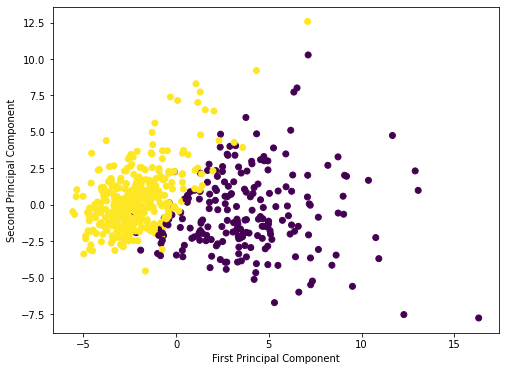

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer["target"])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

### Lets have another example of PCA

In [21]:
df=pd.read_csv("50_Startups.csv")

In [22]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]
states=pd.get_dummies(X["State"], drop_first=True)
X=X.drop("State", axis=1)
X=pd.concat([X, states], axis=1)

In [24]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[-0.26349203,  2.14843908, -1.28405778,  0.81649658, -0.60302269],
       [ 0.68815421, -0.76784864,  0.16158446, -1.22474487, -0.60302269],
       [ 0.7222701 , -0.16428861, -0.0645352 ,  0.81649658, -0.60302269],
       [-1.31239516, -0.99509933, -0.77518518,  0.81649658, -0.60302269],
       [ 2.13868296, -0.46757115,  1.89936921,  0.81649658, -0.60302269],
       [-0.09702257,  0.39006283,  1.297909  , -1.22474487,  1.6583124 ],
       [-1.52304468, -1.59735424, -0.5467499 , -1.22474487,  1.6583124 ],
       [-0.39859934,  1.18729971, -1.61285131, -1.22474487,  1.6583124 ],
       [-0.04515384,  0.22694578,  0.75012558,  0.81649658, -0.60302269],
       [ 1.82712943, -0.78065072,  1.4405505 ,  0.81649658, -0.60302269],
       [-0.55369838, -0.40620116, -0.22411107,  0.81649658, -0.60302269],
       [-0.81428258, -0.9842928 , -0.32426708, -1.22474487,  1.6583124 ],
       [-0.00847634,  0.91234776, -1.10936893,  0.81649658, -0.60302269],
       [-0.80295616,  1.34753433, -0.2

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [29]:
explained_variance=pca.explained_variance_ratio_

In [30]:
explained_variance

array([0.85923093, 0.09653941])

In [31]:
X_train.shape

(35, 2)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred)

In [38]:
score

0.5856013608909427

#### Another example

In [39]:
df=pd.read_csv("Cancer_dataset.csv")

In [40]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
df.shape

(569, 33)

In [41]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [42]:
X=X.dropna(axis=1)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.3, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[-0.18451732,  0.29027332, -0.11194787, ...,  1.43674056,
         1.14762553,  1.58422017],
       [-0.23965237,  1.35938621, -0.30287827, ..., -0.80475167,
        -0.75531247, -0.92105953],
       [-0.00460295, -0.80822321, -0.07199547, ..., -0.46308057,
        -1.26898899, -0.96648301],
       ...,
       [ 0.24205384, -0.57993484,  0.30860368, ...,  1.39965279,
         1.14762553,  1.32798515],
       [-0.10036382, -0.7155517 , -0.14559199, ..., -0.65300087,
         0.71066694, -0.38937186],
       [-0.34411877,  0.4823972 , -0.36469935, ..., -0.86718276,
        -0.68193011, -0.12731331]])

In [ ]:
explained_variance=pca.explained_variance_ratio_

In [ ]:
explained_variance

In [46]:
classifier=LogisticRegression(random_state=0)

In [47]:
classifier.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm=confusion_matrix(y_test, y_pred)

In [51]:
cm

array([[241,  12],
       [ 13, 133]], dtype=int64)